In [1]:
%load_ext autoreload
%autoreload 2

import copy

## initialize `G_baseline` network

In [2]:
N = 1000
INIT_EXPOSED = int(N*0.01)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G_baseline   = demographic_graphs['baseline']
G_quarantine = demographic_graphs['distancingScale0.7']

households_indices = [household['indices'] for household in households]

Generated overall age distribution:
0-9: 0.1350	(0.0140 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1240	(-0.0130 from target)
30-39: 0.1360	(0.0030 from target)
40-49: 0.1270	(0.0030 from target)
50-59: 0.1400	(0.0090 from target)
60-69: 0.1080	(-0.0070 from target)
70-79: 0.0610	(-0.0090 from target)
80+: 0.0380	(0.0000 from target)

Generated household size distribution:
1: 0.3019	(0.0182 from target)
2: 0.3382	(-0.0069 from target)
3: 0.1425	(-0.0082 from target)
4: 0.1256	(-0.0020 from target)
5: 0.0531	(-0.0046 from target)
6: 0.0290	(0.0064 from target)
7: 0.0097	(-0.0028 from target)
Num households: 414
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 20-59...
Generating graph for 60+...


In [4]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel

from seirsplus.sim_loops_pooled_test import SimulationRunner


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## correlated pooling

In [50]:

# don't know why but have to create it every time
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_correlated = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='correlated',
    T = 100,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False,
    output_path = '../results/')

sim_correlated.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 48.20it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 42.67it

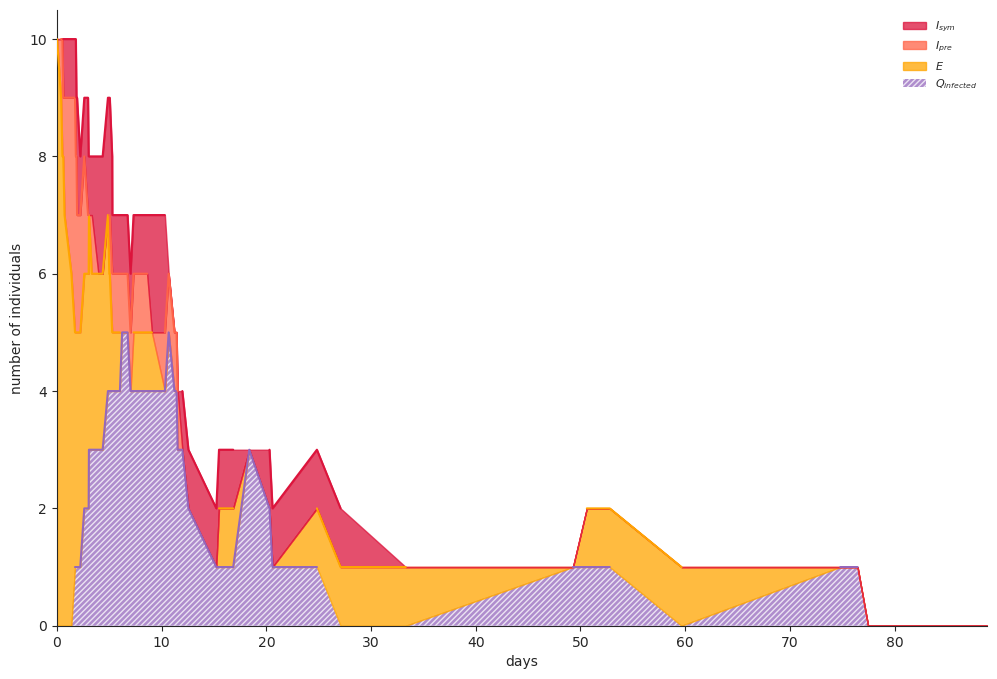

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [51]:
sim_correlated.model.figure_infections(plot_percentages=False)

In [54]:
# cum_num_positives, cum_num_identified, sensitivity, test consumption
sim_correlated.get_cumulative_test_performance() 

{'cum_num_positives': 19,
 'cum_num_identified': 15,
 'cum_sensitivity': 0.7894736842105263,
 'cum_num_tests': 1850}

## Naive pooling

In [5]:
# don't know why but have to create it every time
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='naive',
    T = 100,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False,
    output_path = '../results/')

sim_naive.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running simulation with seed  0  for strategy  naive ...
Running screening for group 0 on day 0 ...
Running screening for group 1 on day 1 ...
Running screening for group 2 on day 2 ...
Running screening for group 3 on day 3 ...
Running screening for group 4 on day 4 ...
Running screening for group 5 on day 5 ...
Running screening for group 6 on day 6 ...
Running screening for group 7 on day 7 ...
Running screening for group 8 on day 8 ...
Running screening for group 9 on day 9 ...
Running screening for group 0 on day 10 ...
Running screening for group 1 on day 11 ...
Running screening for group 2 on day 12 ...
Running screening for group 3 on day 13 ...
Running screening for group 4 on day 14 ...
Running screening for group 5 on day 15 ...
Running screening for group 6 on day 16 ...
Running screening for group 7 on day 17 ...
Running screening for group 8 on day 18 ...
Running screening for group 9 on day 19 ...
Running screening for group 0 on day 20 ...
Running screening for group 1

In [53]:
# cum_num_positives, cum_num_identified, sensitivity, test consumption
sim_naive.get_cumulative_test_performance() 

{'cum_num_positives': 21,
 'cum_num_identified': 12,
 'cum_sensitivity': 0.5714285714285714,
 'cum_num_tests': 1315}

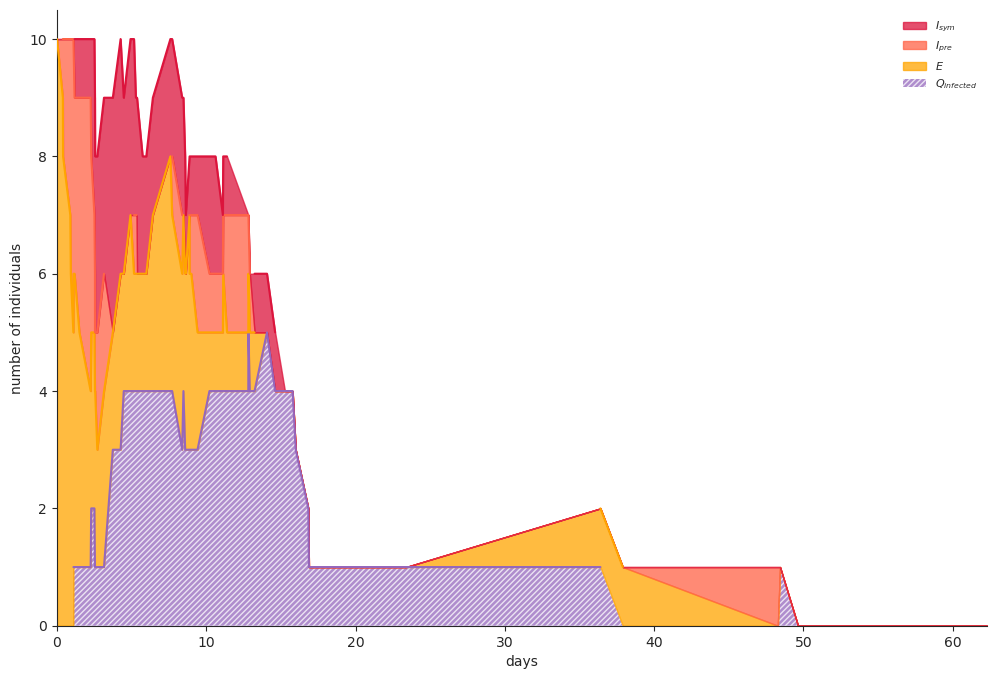

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [47]:
sim_naive.model.figure_infections(plot_percentages=False)